# Evaluation Toolchains

In many situations, some pre- and postprocessing steps are required before the objective function can be evaluated.
For example, to calculate performance indicators of a process, the following steps need to be performed:
- Simulate the process until stationarity is reached.
- Determine fractionation times under purity constraints.
- Calculate objective functions; Here, two performance indicators are considered as objectives:
    - Productivity,
    - Yield recovery.

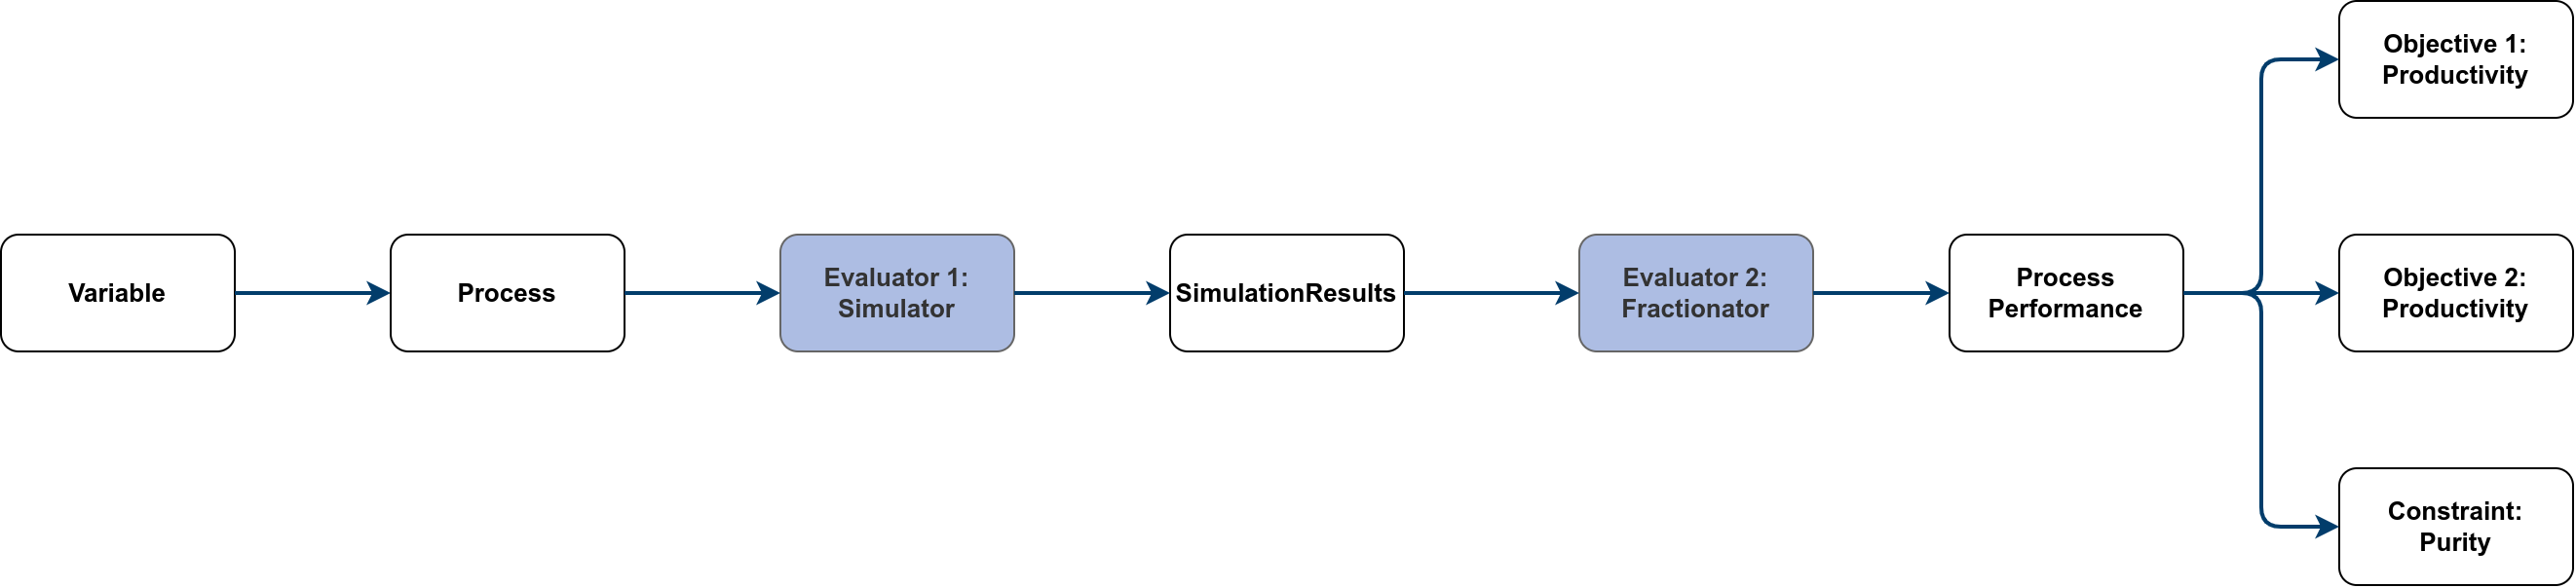

As can be seen in this particular evaluation chain, all objectives and constraints require the same simulation results.
To avoid having to recompute all required steps, **CADET-Process** provides a mechanism to add `Evaluators` to an `OptimizationProblem` which can be referenced by objective and constraint functions.
The intermediate results are then cached automatically.

### Evaluation Objects
Usually, the `OptimizationVariables` refer to attributes of a `ProcessModel` such as model parameters or events.
But also fractionation times of the `Fractionator` or attributes of custom evaluation objects can be used as `OptimizationVariables`.
In this context, an `EvaluationObject` is introduced.

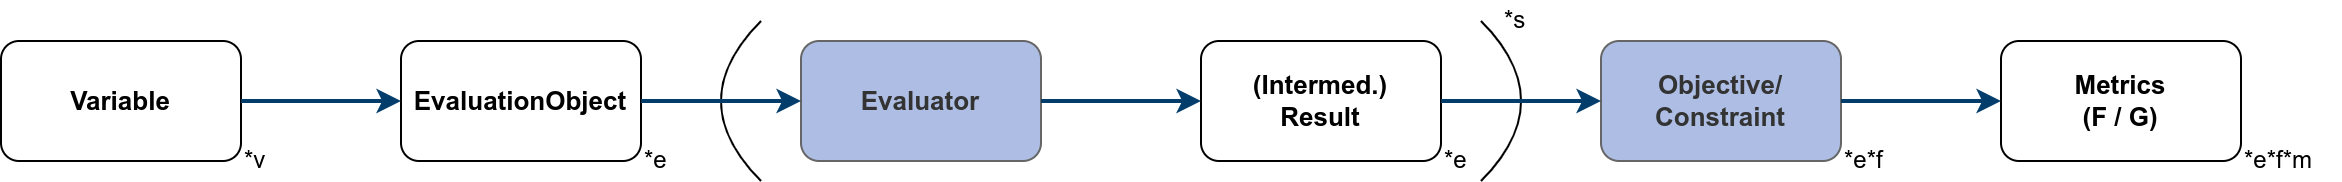

To associate the `OptimizationVariable` with these `EvaluationObjects`, they first need to be added to the `OptimizationProblem`.

In [ ]:
#ToDO: there appears to be a lot missing here.
optimization_problem.add_evaluation_object(evaluation_object)

When adding variables, it is now possible to specify with which `EvaluationObject` the variable is associated.
Moreover, the path to the variable in the evaluation object needs to be specified.

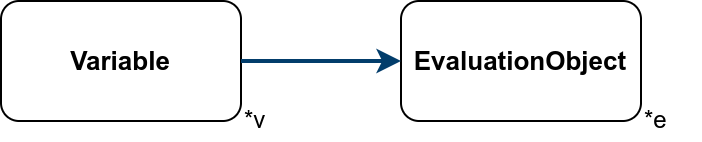


In [ ]:
optimization_problem.add_variable('var_0', evaluation_objects=[evaluation_object], parameter_path='path.to.variable', lb=0, ub=100)

By default, the variable is associated with all evaluation objects.
If no path is provided, the name is also used as path.
Hence, the variable definition can be simplified to:

In [ ]:
optimization_problem.add_variable('path.to.variable', lb=0, ub=100)

To demonstrate the flexibility of this approach, consider two `EvaluationObjects` and two `OptimizationVariables` where one variable is associated with a single `EvaluationObject`, and the other with both.

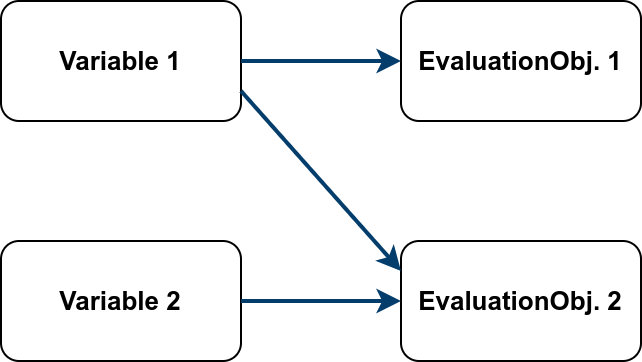

In [ ]:
optimization_problem.add_evaluation_object(eval_obj_1)
optimization_problem.add_evaluation_object(eval_obj_2)
optimization_problem.add_variable('var_1', parameter_path='path.to.variable')
optimization_problem.add_variable('var_2', evaluation_objects=[eval_obj_1])c

### Evaluators
Any callable function can be added as `Evaluator`, assuming the first argument is the result of the previous step and it returns a single result object which is then processed by the next step.
